### Curves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rioxarray as rxr
from rasterio.enums import Resampling

In [4]:
curves_feuerstein = pd.read_csv(f'Curves_Inputs/CURVES_feuerstein_koks.csv', index_col=0)

curves_feuerstein.columns = [col.title() for col in curves_feuerstein.columns]

curves_feuerstein.columns = curves_feuerstein.columns.str.strip()
curves_feuerstein.rename(columns={'Concrete Buidling': 'Concrete Building'}, inplace=True)

curves_feuerstein.head()

,Weakest Outbuilding,Outbuilding Strong,Outbuilding,Weak Brick Structure,Strong Brick Structure,Concrete Building
wind speed,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1728x1296 with 0 Axes>

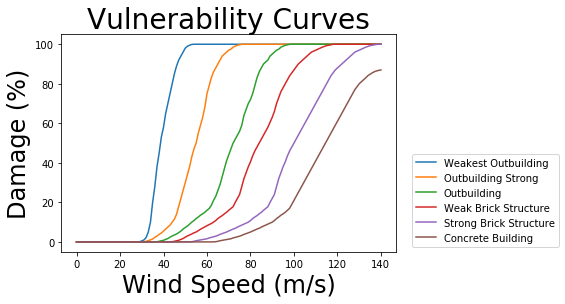

In [5]:
plt.figure(figsize=(24, 18))

# Plot the data
curves_feuerstein.plot()

# Set the title and labels
plt.title('Vulnerability Curves', size=28)
plt.ylabel('Damage (%)', size=24)
plt.xlabel('Wind Speed (m/s)', size=24)

# Limit legend to the first 10 entries
plt.legend(curves_feuerstein.columns[:10], loc='lower right', bbox_to_anchor=(1.5, 0), fontsize=10)

# Save the figure
plt.savefig('Outputs/Vul_Curves.png')

# Show the plot (if needed)
plt.show()

In [14]:
#Create excel for Structural cost by land cover type
Land_cover_info_damage_curve = pd.read_excel('Curves_Inputs/Land_cover_damage_info_curves.xlsx', index_col=1)
# get the maxdamage for reconstruction
maxdam = pd.DataFrame(Land_cover_info_damage_curve['structural $/m²'])

# create a new dataframe for damage_curves_luisa where wind and landuse classes are used
damage_curves_land_cover = curves_feuerstein.copy()
# drop all columns
damage_curves_land_cover.drop(damage_curves_land_cover.columns, axis=1, inplace=True)

building_types = ['weakest outbuilding', 'outbuilding',	'strong outbuilding', 'weak brick structure',	'strong brick structure', 'concrete buidling']

# for each land use class in maxdamage create a new damage curve
for landuse in maxdam.index:
    # find the ratio of building types in the class
    ratio = Land_cover_info_damage_curve.loc[landuse, building_types].values

    # new curve
    damage_curves_land_cover[landuse] =  ratio[0] * curves_feuerstein.iloc[:,0] + \
                                    ratio[1] * curves_feuerstein.iloc[:,1] + \
                                    ratio[2] * curves_feuerstein.iloc[:,2] + \
                                    ratio[3] * curves_feuerstein.iloc[:,3] + \
                                    ratio[4] * curves_feuerstein.iloc[:,4] + \
                                    ratio[5] * curves_feuerstein.iloc[:,5]

damage_curves_land_cover.to_csv(f'Outputs/damage_curves_land_cover.csv')

In [25]:
Land_cover_info_damage_curve

,Land use code,NLCD Mapping,GDP/capita,a_res,a_com,a_ind,b_res,b_com,b_ind,a_landuse,...,total $/m²,residential,commercial,industrial,weakest outbuilding,outbuilding,strong outbuilding,weak brick structure,strong brick structure,concrete buidling
Description,,,,,,,,,,,,,,,,,,,,,
High density urban fabric,1111,Developed High Intensity,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,28.8600,...,636.285971,0.5,0.5,0.0,0.0,0.00,0.05,0.20,0.70,0.05
Medium density urban fabric,1121,Developed Medium Intensity,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,27.9036,...,439.369365,0.6,0.4,0.0,0.0,0.00,0.10,0.25,0.65,0.00
Low density urban fabric,1122,Developed Low Intensity,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,27.6218,...,259.724379,0.6,0.3,0.1,0.0,0.05,0.10,0.35,0.50,0.00
Isolated or very low density urban fabric,1123,Developed Open Space,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,26.7764,...,74.114335,0.6,0.0,0.4,0.0,0.12,0.13,0.35,0.40,0.00
Pastures,2310,Pasture/Hay,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,24.0780,...,52.664923,1.0,0.0,0.0,0.5,0.50,0.00,0.00,0.00,0.00
Annual crops associated with permanent crops,2410,Cultivated Crops,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,24.0780,...,52.664923,1.0,0.0,0.0,0.5,0.50,0.00,0.00,0.00,0.00
Broad-leaved forest,3110,Deciduous Forest,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
Coniferous forest,3120,Evergreen Forest,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
Mixed forest,3130,Mixed Forest,32169,24.078,33.642,30.824,0.3852,0.3574,0.3249,0.0000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


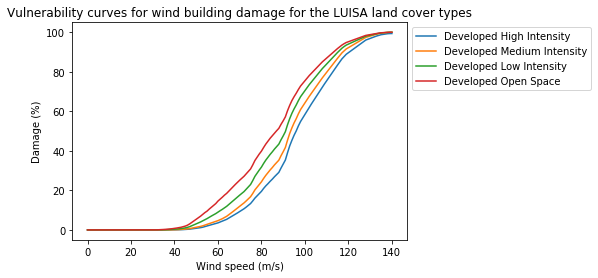

In [13]:
damage_curves_land_cover.plot()
plt.title('Vulnerability curves for wind building damage for the LUISA land cover types')
plt.ylabel('Damage (%)')
plt.xlabel('Wind speed (m/s)')

# only show legend for the first 10 entries
plt.legend(damage_curves_land_cover.columns[0:4], loc='upper left', bbox_to_anchor=(1, 1)) #only first 4

In [8]:
# Create a custom mapping between the two lists (Euro vs North america)
land_cover_mapping = {
    'High density urban fabric': 'Developed High Intensity',
    'Medium density urban fabric': 'Developed Medium Intensity',
    'Low density urban fabric': 'Developed Low Intensity',
    'Isolated or very low density urban fabric': 'Developed Open Space',
    'Pastures': 'Pasture Hay',
    'Annual crops associated with permanent crops': 'Cultivated Crops',
    'Broad-leaved forest': 'Deciduous Forest',
    'Coniferous forest': 'Evergreen Forest',
    'Mixed forest': 'Mixed Forest',
    'Natural grassland': 'Grasslands',
    'Transitional woodland shrub': 'Shrub',
    'Bare rock': 'Barren Land',
    'Wetlands': 'Woody Wetlands',
    'Estuaries': 'Open Water',  # Assumption based on proximity to water
    'Sea and ocean': 'Open Water'  # Assumption
}

# Print the mapping
#print(land_cover_mapping)


{'High density urban fabric': 'Developed High Intensity', 'Medium density urban fabric': 'Developed Medium Intensity', 'Low density urban fabric': 'Developed Low Intensity', 'Isolated or very low density urban fabric': 'Developed Open Space', 'Pastures': 'Pasture Hay', 'Annual crops associated with permanent crops': 'Cultivated Crops', 'Broad-leaved forest': 'Deciduous Forest', 'Coniferous forest': 'Evergreen Forest', 'Mixed forest': 'Mixed Forest', 'Natural grassland': 'Grasslands', 'Transitional woodland shrub': 'Shrub', 'Bare rock': 'Barren Land', 'Wetlands': 'Woody Wetlands', 'Estuaries': 'Open Water', 'Sea and ocean': 'Open Water'}


In [9]:
damage_curves_land_cover.rename(columns=land_cover_mapping, inplace=True)

In [ ]:
#print(damage_curves_land_cover.to_string())

In [11]:
columns_to_remove = [
    'Pasture Hay',
    'Cultivated Crops',
    'Deciduous Forest',
    'Evergreen Forest',
    'Mixed Forest',
    'Grasslands',
    'Shrub',
    'Barren Land',
    'Woody Wetlands',
    'Open Water'
]
damage_curves_land_cover.drop(columns=columns_to_remove, inplace=True)

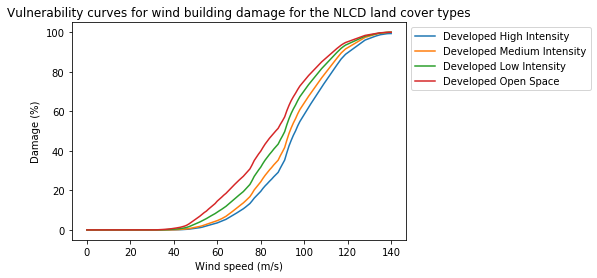

In [12]:
damage_curves_land_cover.plot()
plt.title('Vulnerability curves for wind building damage for the NLCD land cover types')
plt.ylabel('Damage (%)')
plt.xlabel('Wind speed (m/s)')

# only show legend for the first 10 entries
plt.legend(damage_curves_land_cover.columns[0:10], loc='upper left', bbox_to_anchor=(1, 1))

In [19]:
damage_curves_land_cover.to_csv('Outputs/2020_damage_curves_land_cover.csv')